# EC2B1 Coursework

## Part A
**Trend calculation.** Calculate a trend time paths for (the natural logs of) (i) real GDP and (ii) real GDP per capita. All at constant 2017 national prices using data over the whole sample. We will provide a simple template Python program that you can use to fit a time trend. Present two panels with the natural logarithm of each variable and the corresponding trend time path. As a robustness exercise, use the levels instead of log levels in the trend regression.

In [2]:
# Import modules
import pandas as pd
import numpy as np

from get_regression_coefs_general import get_regression_coefs

# For plotting
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_theme('talk', style = 'white')

import openpyxl

# Set display options
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None)  
pd.set_option('display.width', None)  
pd.set_option('display.max_colwidth', None) 

# Load dataset
data = pd.read_excel('pwt100.xlsx', sheet_name = 'Data', header = 0)

# Clean data 

# Subset relevant columns and compute per capita real GDP
data = data.loc[:, ("country", "year", "rgdpna", "pop", "emp", "rnna")]
data["rgdpna_pc"] = data["rgdpna"] / data["pop"]

# Select Indonesia as country
data = data.loc[data["country"] == "Indonesia", ("year", "rgdpna_pc", "rgdpna", "emp", "rnna")]
data = data.reset_index(drop = True)

# Subset the RGDP per capita series
ymax = 2019
ymin = 1960
Y = data.loc[np.logical_and(data["year"] <= ymax, data["year"] >= ymin), "rgdpna_pc"]
y = np.log(Y)
data = data[data["year"] >= ymin] 

# Compute separate sample sizes for the subsample used for regression and the whole sample
T = len(Y) # sample size used for regression
T_all = data["year"].max() - (ymin - 1) # number of all years in the data 


### 1) Additive Linear Model 
First regressor x1 is (T x 1) vector of ones, second regressor x2 is the vector 1, 2, ..., T<br>The dependent variable is per capital GDP in levels 

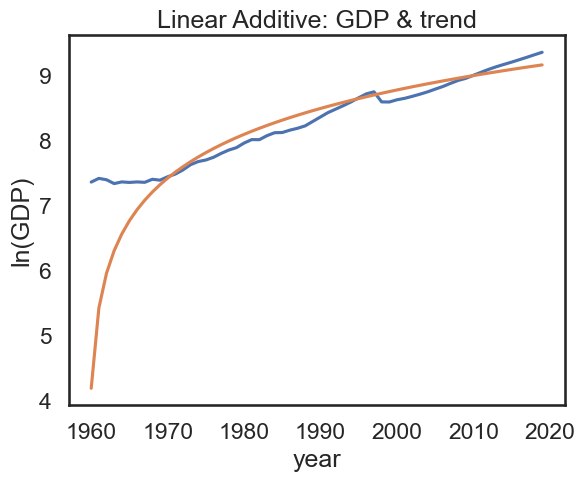

In [3]:
x1 = np.empty(T) 
x2 = np.empty(T) 

for t in range(T):
    x1[t] = 1.
    x2[t] = t + 1 

a_add_lin, b_add_lin = get_regression_coefs(Y, x1, x2)

# Initialise predicted values yhat 
Yhat_add_lin = np.empty(T_all)

# Create loop to compute trend for all years
for t in range(T_all):
    Yhat_add_lin[t] = a_add_lin + b_add_lin * (t + 1) # recall that Python indexing starts at 0

# Convert into log units
yhat_add_lin = np.log(Yhat_add_lin)

lw = 4

# Plotting the figure
plt.figure()
plt.plot(data['year'],np.log(data['rgdpna_pc']))
plt.plot(data['year'],yhat_add_lin)

#labels
plt.xlabel("year")
plt.ylabel("ln(GDP)")

#title
plt.title("Linear Additive: GDP & trend")

plt.show()


### 2) Additive Quadratic Model
First regressor x1 is T x 1 vector of ones, second regressor x2 is the vector 1, 2, ..., T, third regressor x3 is the vector 1, 4, 9, ..., T^2<br>The dependent variable is per capital GDP in levels 

C:\Users\Veronica\AppData\Local\Temp\ipykernel_15384\3914848146.py:35: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


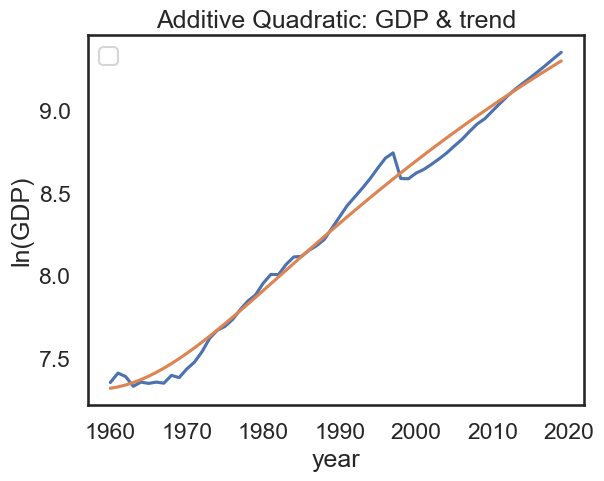

In [4]:

x1 = np.empty(T) 
x2 = np.empty(T) 
x3 = np.empty(T)

for t in range(T):
    x1[t] = 1.
    x2[t] = t + 1 
    x3[t] = (t + 1) ** 2

a_add_quad, b_add_quad, c_add_quad = get_regression_coefs(Y, x1, x2, x3)

# Initialise predicted values yhat 
Yhat_add_quad = np.empty(T_all)

# Create loop to compute trend for all years
for t in range(T_all):
    Yhat_add_quad[t] = a_add_quad + b_add_quad * (t + 1) + c_add_quad * (t + 1) ** 2

# Convert into log units
yhat_add_quad = np.log(Yhat_add_quad)

lw = 4

# Plotting the figure
plt.figure()
plt.plot(data['year'],np.log(data['rgdpna_pc']))
plt.plot(data['year'],yhat_add_quad)

#labels
plt.xlabel("year")
plt.ylabel("ln(GDP)")

#title
plt.title("Additive Quadratic: GDP & trend")
plt.legend()

plt.show()


### 3) Exponential Linear Model
First regressor x1 is T x 1 vector of ones, second regressor x2 is the vector 1, 2, ..., T, third regressor x3 is the vector exp(1), exp(2), ..., exp(T)<br>The dependent variable is per capital GDP in levels 

C:\Users\Veronica\AppData\Local\Temp\ipykernel_15384\3257528521.py:33: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


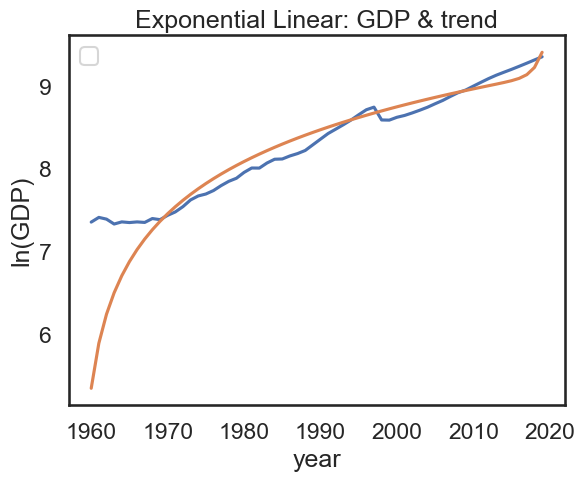

In [5]:
x1 = np.empty(T) 
x2 = np.empty(T) 
x3 = np.empty(T)

for t in range(T):
    x1[t] = 1.
    x2[t] = t + 1 
    x3[t] = np.exp(t + 1)

a_exp_lin, b_exp_lin, c_exp_lin = get_regression_coefs(Y, x1, x2, x3)

Yhat_exp_lin = np.empty(T_all)

for t in range(T_all):
    Yhat_exp_lin[t] = a_exp_lin + b_exp_lin * (t + 1) + c_exp_lin * np.exp(t + 1)

# Initialise predicted values yhat 
yhat_exp_lin = np.log(Yhat_exp_lin)

lw = 4

# Plotting the figure
plt.figure()
plt.plot(data['year'],np.log(data['rgdpna_pc']))
plt.plot(data['year'],yhat_exp_lin)

#labels
plt.xlabel("year")
plt.ylabel("ln(GDP)")

#title
plt.title("Exponential Linear: GDP & trend")
plt.legend()

plt.show()


### 4) Exponential Quadratic Model
First regressor x1 is T x 1 vector of ones, second regressor x2 is the vector exp(1), exp(2), ..., exp(T) third regressor x3 is the vector 1, 4, 9, ..., T^2<br>The dependent variable is per capital GDP in levels 

C:\Users\Veronica\AppData\Local\Temp\ipykernel_15384\395404271.py:33: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


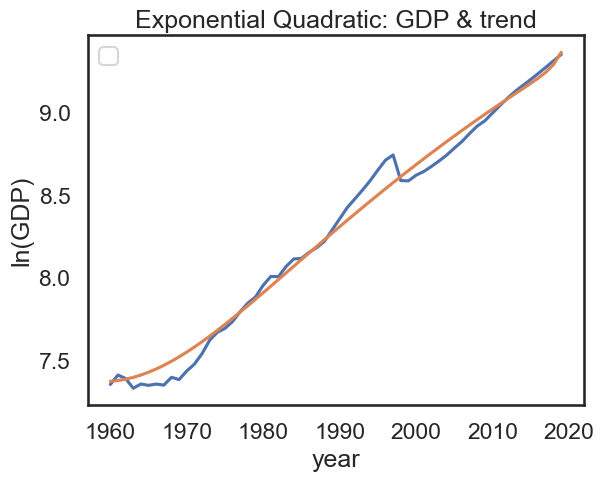

In [6]:
x1 = np.empty(T) 
x2 = np.empty(T) 
x3 = np.empty(T)

for t in range(T):
    x1[t] = 1.
    x2[t] = np.exp(t + 1)
    x3[t] = (t + 1) ** 2

a_exp_quad, b_exp_quad, c_exp_quad = get_regression_coefs(Y, x1, x2, x3)

# Initialise predicted values yhat 
Yhat_exp_quad = np.empty(T_all)

for t in range(T_all):
    Yhat_exp_quad[t] = a_exp_quad + b_exp_quad * np.exp(t + 1) + c_exp_quad * (t + 1) ** 2

yhat_exp_quad = np.log(Yhat_exp_quad)

lw = 4

# Plotting the figure
plt.figure()
plt.plot(data['year'],np.log(data['rgdpna_pc']))
plt.plot(data['year'],yhat_exp_quad)

#labels
plt.xlabel("year")
plt.ylabel("ln(GDP)")

#title
plt.title("Exponential Quadratic: GDP & trend")
plt.legend()

plt.show()

## Part B 
**Extract TFP measure.** Take a stand on the production function and extract a
measure for TFP. You can do this using (i) real GDP (rgdpna), (ii) the number of
employed workers (emp), and (iii) the capital stock at constant 2017 national prices (rnna). But you may also consider using the human capital index (hc). The
benchmark value for alpha should be 0.3 but check whether your results are robust
to alternative values.

In [10]:
pd.set_option("display.float_format", "{:.2f}".format)  # set display setting

data.reset_index(drop=True, inplace=True)
data.index += 1 # set index to start from 1

# Set parameters
alpha = 0.3

# Extract Data as numpy arrays. 
year = data["year"].to_numpy()  
Y = data["rgdpna"].to_numpy()
K = data["rnna"].to_numpy()
L = data["emp"].to_numpy()

# construct TFP as the Solow residual
tmp = Y / (K**alpha * L ** (1 - alpha))
A = tmp ** (1 / (1 - alpha))

# Add TFP series to our dataframe and inspect the data.
data["TFP (A)"] = A
display(data[["rgdpna","rnna","TFP (A)","emp",]])

,rgdpna,rnna,TFP (A),emp
1,147538.92,762376.75,2560.91,28.50
2,159648.61,765323.19,2806.35,29.06
3,159406.12,764462.19,2753.40,29.57
4,153244.64,756324.50,2569.47,30.09
5,160370.23,751605.56,2701.62,30.62
6,162256.95,747606.50,2705.66,31.16
7,166785.05,747132.81,2766.01,31.71
8,169049.11,740671.00,2781.04,32.27
9,180746.70,743595.50,3001.57,32.84
10,181878.73,751132.88,2962.78,33.43


## Part C
**Growth accounting.** Calculate the contribution of each input variable to measured
changes in GDP. Remember that we are interested in long-run developments. It is
up to you to think on how to best capture that and the answer may very well be
different for different countries. Tip: Check HW #2 and recall that it is wrong to do
growth accounting per year and then take the average.

	 Year by Year Growth Rate 

	 year 	 	 ln(Y_t/Y_{t-1}) 
	 ------- 	 ------ 
	 1960-1961 	 0.0789
	 1961-1962 	 -0.0015
	 1962-1963 	 -0.0394
	 1963-1964 	 0.0454
	 1964-1965 	 0.0117
	 1965-1966 	 0.0275
	 1966-1967 	 0.0135
	 1967-1968 	 0.0669
	 1968-1969 	 0.0062
	 1969-1970 	 0.0720
	 1970-1971 	 0.0677
	 1971-1972 	 0.0900
	 1972-1973 	 0.1071
	 1973-1974 	 0.0736
	 1974-1975 	 0.0486
	 1975-1976 	 0.0665
	 1976-1977 	 0.0840
	 1977-1978 	 0.0755
	 1978-1979 	 0.0606
	 1979-1980 	 0.0942
	 1980-1981 	 0.0763
	 1981-1982 	 0.0222
	 1982-1983 	 0.0841
	 1983-1984 	 0.0674
	 1984-1985 	 0.0243
	 1985-1986 	 0.0571
	 1986-1987 	 0.0481
	 1987-1988 	 0.0562
	 1988-1989 	 0.0870
	 1989-1990 	 0.0862
	 1990-1991 	 0.0855
	 1991-1992 	 0.0697
	 1992-1993 	 0.0700
	 1993-1994 	 0.0727
	 1994-1995 	 0.0790
	 1995-1996 	 0.0753
	 1996-1997 	 0.0459
	 1997-1998 	 -0.1407
	 1998-1999 	 0.0079
	 1999-2000 	 0.0480
	 2000-2001 	 0.0358
	 2001-2002 	 0.0440
	 2002-2003 	 0.0467
	 2003-2004 	 0.0

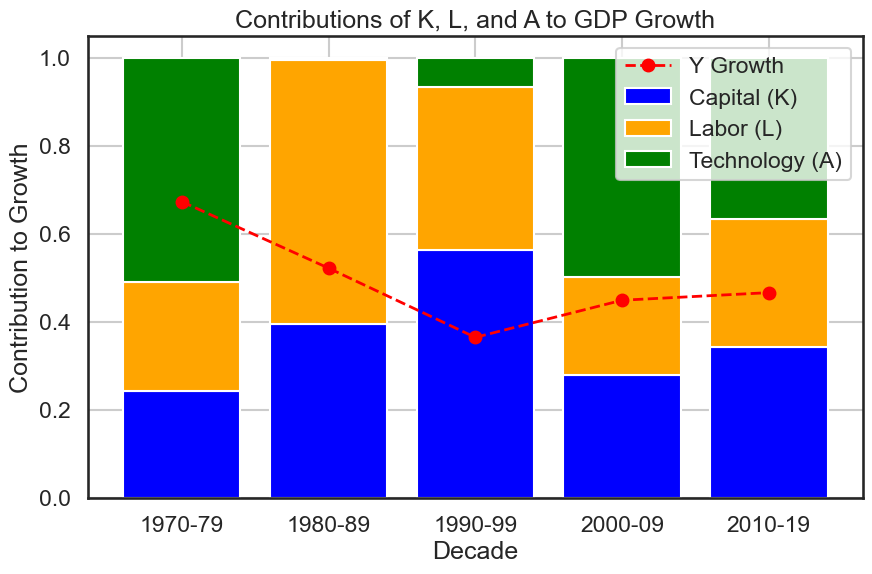

In [ ]:
# Define a function that calculate yearly growth rates using log growth rates
def compute_growth_rate(X):
    return np.log(X[1:] / X[:-1])

dY = compute_growth_rate(Y)
dA = compute_growth_rate(A)
dK = compute_growth_rate(K)
dL = compute_growth_rate(L)

# calculate contributions
contrib_dK = alpha * dK / dY
contrib_dL = (1 - alpha) * dL / dY
contrib_dA = (1 - alpha) * dA / dY


# Display growth rates
print("\t Year by Year Growth Rate \n")
print("\t year \t \t ln(Y_t/Y_{t-1}) ")
print("\t ------- \t ------ ")
for y1, y2, growth in zip(year[:-1], year[1:], dY):
    print(f"\t {y1:.0f}-{y2:.0f} \t {growth:.4f}")

# calculate contributions
contrib_dK = alpha * dK / dY
contrib_dL = (1 - alpha) * dL / dY
contrib_dA = (1 - alpha) * dA / dY

# To inspect the results we convert the numpy arrays to a pandas dataframe holding the contributions
# First we need to concatenate (stack horizontally) the contribution arrays into a matrix
# Note that in Python 1D-arrays are given as row vectors (row major). So stacking arrays horizontally would create a long row vector.
# X[:, None] is a simple way to convert a 1D row vector to a column vector

# Compute yearly intervals of the form "2000-2001"
intvls = np.array([f"{y1}-{y2}" for y1, y2 in zip(year[:-1], year[1:])])

# Fill in the dataframe
df_contribs = pd.DataFrame(
    data=np.hstack(
        (intvls[:, None], contrib_dK[:, None], contrib_dL[:, None], contrib_dA[:, None])
    ),
    columns=["year", "K contribution", "L contribution", "A contribution"],
)

# Specify the data types for specific columns (it would be more efficient to define dataypes already before creating dataframe)
df_contribs = df_contribs.astype(
    {
        "year": "object",
        "K contribution": "float64",
        "L contribution": "float64",
        "A contribution": "float64",
    }
)

# Set index
df_contribs = df_contribs.set_index("year")

# Set display options
pd.set_option("display.float_format", "{:.4f}".format)

# Display contribution table
print("\n\t == Year by year contributions == \n")
print(df_contribs)
print("\n")

avg_contribs = df_contribs.mean()
print(avg_contribs)

print("year \t \t K contrib \t L contrib \t A contrib \t Y growth")
print("------- \t --------- \t --------- \t --------- \t --------")

print(
    f"1970-79 \t {alpha * np.log(K[19]/K[10]) / np.log(Y[19]/Y[10]):.4f}",
    f"\t {(1-alpha) * np.log(L[19]/L[10]) / np.log(Y[19]/Y[10]):.4f}",
    f"\t {(1-alpha) * np.log(A[19]/A[10]) / np.log(Y[19]/Y[10]):.4f}",
    f"\t {np.log(Y[19] / Y[10]):.4f}",
)

print(
    f"1980-89 \t {alpha * np.log(K[29]/K[20]) / np.log(Y[29]/Y[20]):.4f}",
    f"\t {(1-alpha) * np.log(L[29]/L[20]) / np.log(Y[29]/Y[20]):.4f}",
    f"\t {(1-alpha) * np.log(A[29]/A[20]) / np.log(Y[29]/Y[20]):.4f}",
    f"\t {np.log(Y[29] / Y[20]):.4f}",
)

print(
    f"1990-99 \t {alpha * np.log(K[39]/K[30]) / np.log(Y[39]/Y[30]):.4f}",
    f"\t {(1-alpha) * np.log(L[39]/L[30]) / np.log(Y[39]/Y[30]):.4f}",
    f"\t {(1-alpha) * np.log(A[39]/A[30]) / np.log(Y[39]/Y[30]):.4f}",
    f"\t {np.log(Y[39] / Y[30]):.4f}",
)

print(
    f"2000-09 \t {alpha * np.log(K[49]/K[40]) / np.log(Y[49]/Y[40]):.4f}",
    f"\t {(1-alpha) * np.log(L[49]/L[40]) / np.log(Y[49]/Y[40]):.4f}",
    f"\t {(1-alpha) * np.log(A[49]/A[40]) / np.log(Y[49]/Y[40]):.4f}",
    f"\t {np.log(Y[49] / Y[40]):.4f}",
)

print(
    f"2010-19 \t {alpha * np.log(K[59]/K[50]) / np.log(Y[59]/Y[50]):.4f}",
    f"\t {(1-alpha) * np.log(L[59]/L[50]) / np.log(Y[59]/Y[50]):.4f}",
    f"\t {(1-alpha) * np.log(A[59]/A[50]) / np.log(Y[59]/Y[50]):.4f}",
    f"\t {np.log(Y[59] / Y[50]):.4f}",
)

## FOR OUR REFERENCE ONLY - NOT FOR SUBMISSION
data = pd.DataFrame({
    "Year": ["1970-79", "1980-89", "1990-99", "2000-09", "2010-19"],
    "K_contrib": [0.2428, 0.3958, 0.5631, 0.2798, 0.3442],
    "L_contrib": [0.2474, 0.6002, 0.3721, 0.2236, 0.2892],
    "A_contrib": [0.5098, 0.0040, 0.0648, 0.4967, 0.3666],
    "Y_growth": [0.6738, 0.5227, 0.3653, 0.4497, 0.4670]
})

# Plotting a stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Stacked bars for K, L, A contributions
ax.bar(data["Year"], data["K_contrib"], label="Capital (K)", color="blue")
ax.bar(data["Year"], data["L_contrib"], label="Labour (L)", bottom=data["K_contrib"], color="orange")
ax.bar(data["Year"], data["A_contrib"], label="TFP (A)", 
       bottom=data["K_contrib"] + data["L_contrib"], color="green")

# Overlay Y Growth as a line plot
ax.plot(data["Year"], data["Y_growth"], marker="o", color="red", linestyle="dashed", linewidth=2, label="Y Growth")

# Labels and Title
plt.xlabel("Decade")
plt.ylabel("Contribution to Growth")
plt.title("Contributions of K, L, and A to GDP Growth")
plt.legend()
plt.grid(True)

# Show Plot
plt.show()

## Part D
**Labour productivity.** Construct a series for labour productivity, i.e., GDP per
worker.

,year,lbrpd,rgdpna,emp
1,1960,5176.99,147538.92,28.50
2,1961,5493.65,159648.61,29.06
3,1962,5390.92,159406.12,29.57
4,1963,5093.09,153244.64,30.09
5,1964,5237.66,160370.23,30.62
6,1965,5207.36,162256.95,31.16
7,1966,5259.64,166785.05,31.71
8,1967,5238.23,169049.11,32.27
9,1968,5503.07,180746.70,32.84
10,1969,5440.91,181878.73,33.43


C:\Users\Veronica\AppData\Local\Temp\ipykernel_15384\2811157374.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


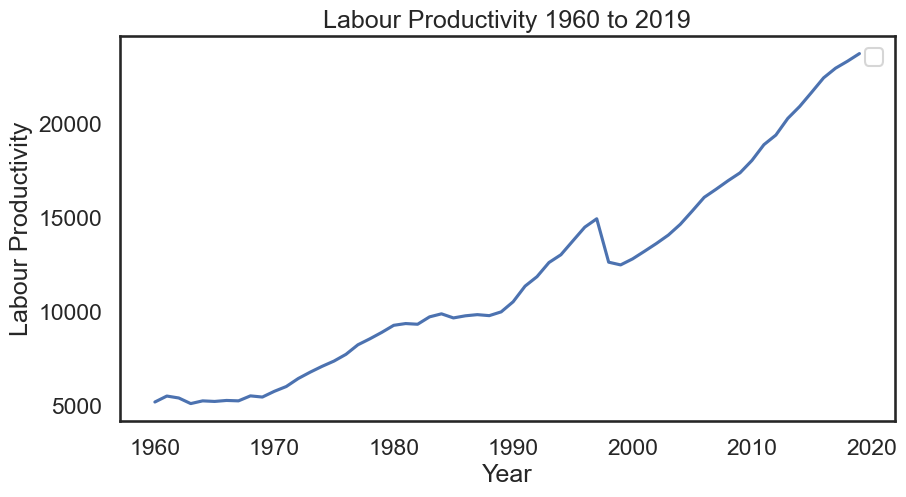

In [14]:
# Calculating labour productivity and displaying the results
data["lbrpd"] = data["rgdpna"] / data["emp"]
display(data[['year', 'lbrpd', 'rgdpna', 'emp']])

# Plotting graph
plt.figure(figsize=(10, 5))
plt.plot(data["year"], data["lbrpd"])


plt.xlabel("Year")
plt.ylabel("Labour Productivity")
plt.title("Labour Productivity 1960 to 2019")
plt.legend()